<font color="Teal" face="Comic Sans MS,arial">
  <h1 align="center"><i>Ejercicio 2</i></h1>
  </font>
  <font color="Black" face="Comic Sans MS,arial">
  <h5 align="center"><i>estudiante: Lazcano Lagos Jhony Brandon</i></h5>
  <h5 align="center"><i>estudiante: Ramírez Montes Jonathan Natael</i></h5>
  <h5 align="center"><i>Análisis Multivariado</i></h5>
  </font>

In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display, HTML
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc

In [3]:
rel_path = './datasets/'
pinguinos = pd.read_csv(rel_path + 'pinguinos.csv')

In [4]:
pinguinos

,Unnamed: 0,specimen,largo_pico_mm,ancho_pico_mm,longitud_aleta_mm,masa_cuerpo_gr
0,0,0,39.1,18.7,181.0,3750.0
1,1,1,39.5,17.4,186.0,3800.0
2,2,2,40.3,18.0,195.0,3250.0
3,3,3,36.7,19.3,193.0,3450.0
4,4,4,39.3,20.6,190.0,3650.0
...,...,...,...,...,...,...
328,328,328,47.2,13.7,214.0,4925.0
329,329,329,46.8,14.3,215.0,4850.0
330,330,330,50.4,15.7,222.0,5750.0
331,331,331,45.2,14.8,212.0,5200.0


Veamos que tipo de datos tenemos 

In [5]:
pinguinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         333 non-null    int64  
 1   specimen           333 non-null    int64  
 2   largo_pico_mm      333 non-null    float64
 3   ancho_pico_mm      333 non-null    float64
 4   longitud_aleta_mm  333 non-null    float64
 5   masa_cuerpo_gr     333 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 15.7 KB


Veamos que caracteristicas tienen los pinguinos de los que conocemos su especie

In [6]:
pinguinos[41:42]

,Unnamed: 0,specimen,largo_pico_mm,ancho_pico_mm,longitud_aleta_mm,masa_cuerpo_gr
41,41,41,41.1,19.0,182.0,3425.0


In [7]:
pinguinos[328:329]

,Unnamed: 0,specimen,largo_pico_mm,ancho_pico_mm,longitud_aleta_mm,masa_cuerpo_gr
328,328,328,47.2,13.7,214.0,4925.0


In [8]:
pinguinos[148:149]

,Unnamed: 0,specimen,largo_pico_mm,ancho_pico_mm,longitud_aleta_mm,masa_cuerpo_gr
148,148,148,51.3,19.2,193.0,3650.0


Podemos observar que hay mucha diferencia entre el individuo 328 con el individuo 41 y 148

Enre el individuo 41 y 148 hay un poco más de similitud por el ancho de su pico

Lo anterior nos hace pensar que si puede haber una separacion

In [9]:
pinguinos.corr()

,Unnamed: 0,specimen,largo_pico_mm,ancho_pico_mm,longitud_aleta_mm,masa_cuerpo_gr
Unnamed: 0,1.000000,1.000000,0.705402,-0.692104,0.831455,0.692007
specimen,1.000000,1.000000,0.705402,-0.692104,0.831455,0.692007
largo_pico_mm,0.705402,0.705402,1.000000,-0.228626,0.653096,0.589451
ancho_pico_mm,-0.692104,-0.692104,-0.228626,1.000000,-0.577792,-0.472016
longitud_aleta_mm,0.831455,0.831455,0.653096,-0.577792,1.000000,0.872979
masa_cuerpo_gr,0.692007,0.692007,0.589451,-0.472016,0.872979,1.000000


Covariance matrix


,Unnamed: 0,specimen,largo_pico_mm,ancho_pico_mm,longitud_aleta_mm,masa_cuerpo_gr
Unnamed: 0,1.000000,1.000000,0.705402,-0.692104,0.831455,0.692007
specimen,1.000000,1.000000,0.705402,-0.692104,0.831455,0.692007
largo_pico_mm,0.705402,0.705402,1.000000,-0.228626,0.653096,0.589451
ancho_pico_mm,-0.692104,-0.692104,-0.228626,1.000000,-0.577792,-0.472016
longitud_aleta_mm,0.831455,0.831455,0.653096,-0.577792,1.000000,0.872979
masa_cuerpo_gr,0.692007,0.692007,0.589451,-0.472016,0.872979,1.000000


<AxesSubplot:>

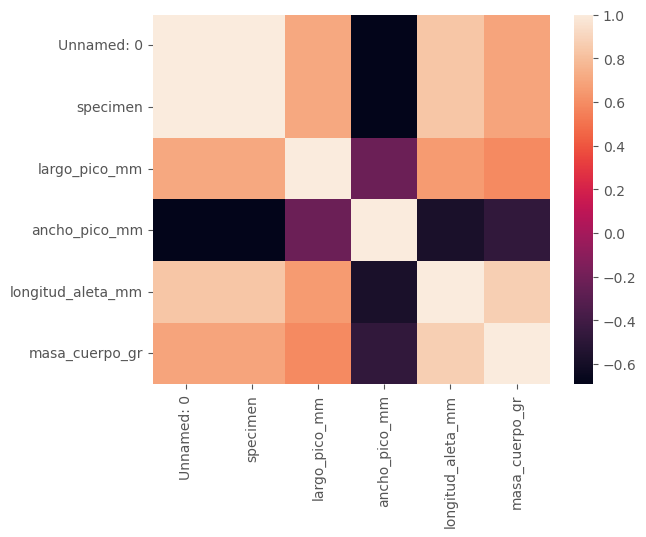

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
print("Covariance matrix")
display(pinguinos.corr())
sns.heatmap(pinguinos.corr())

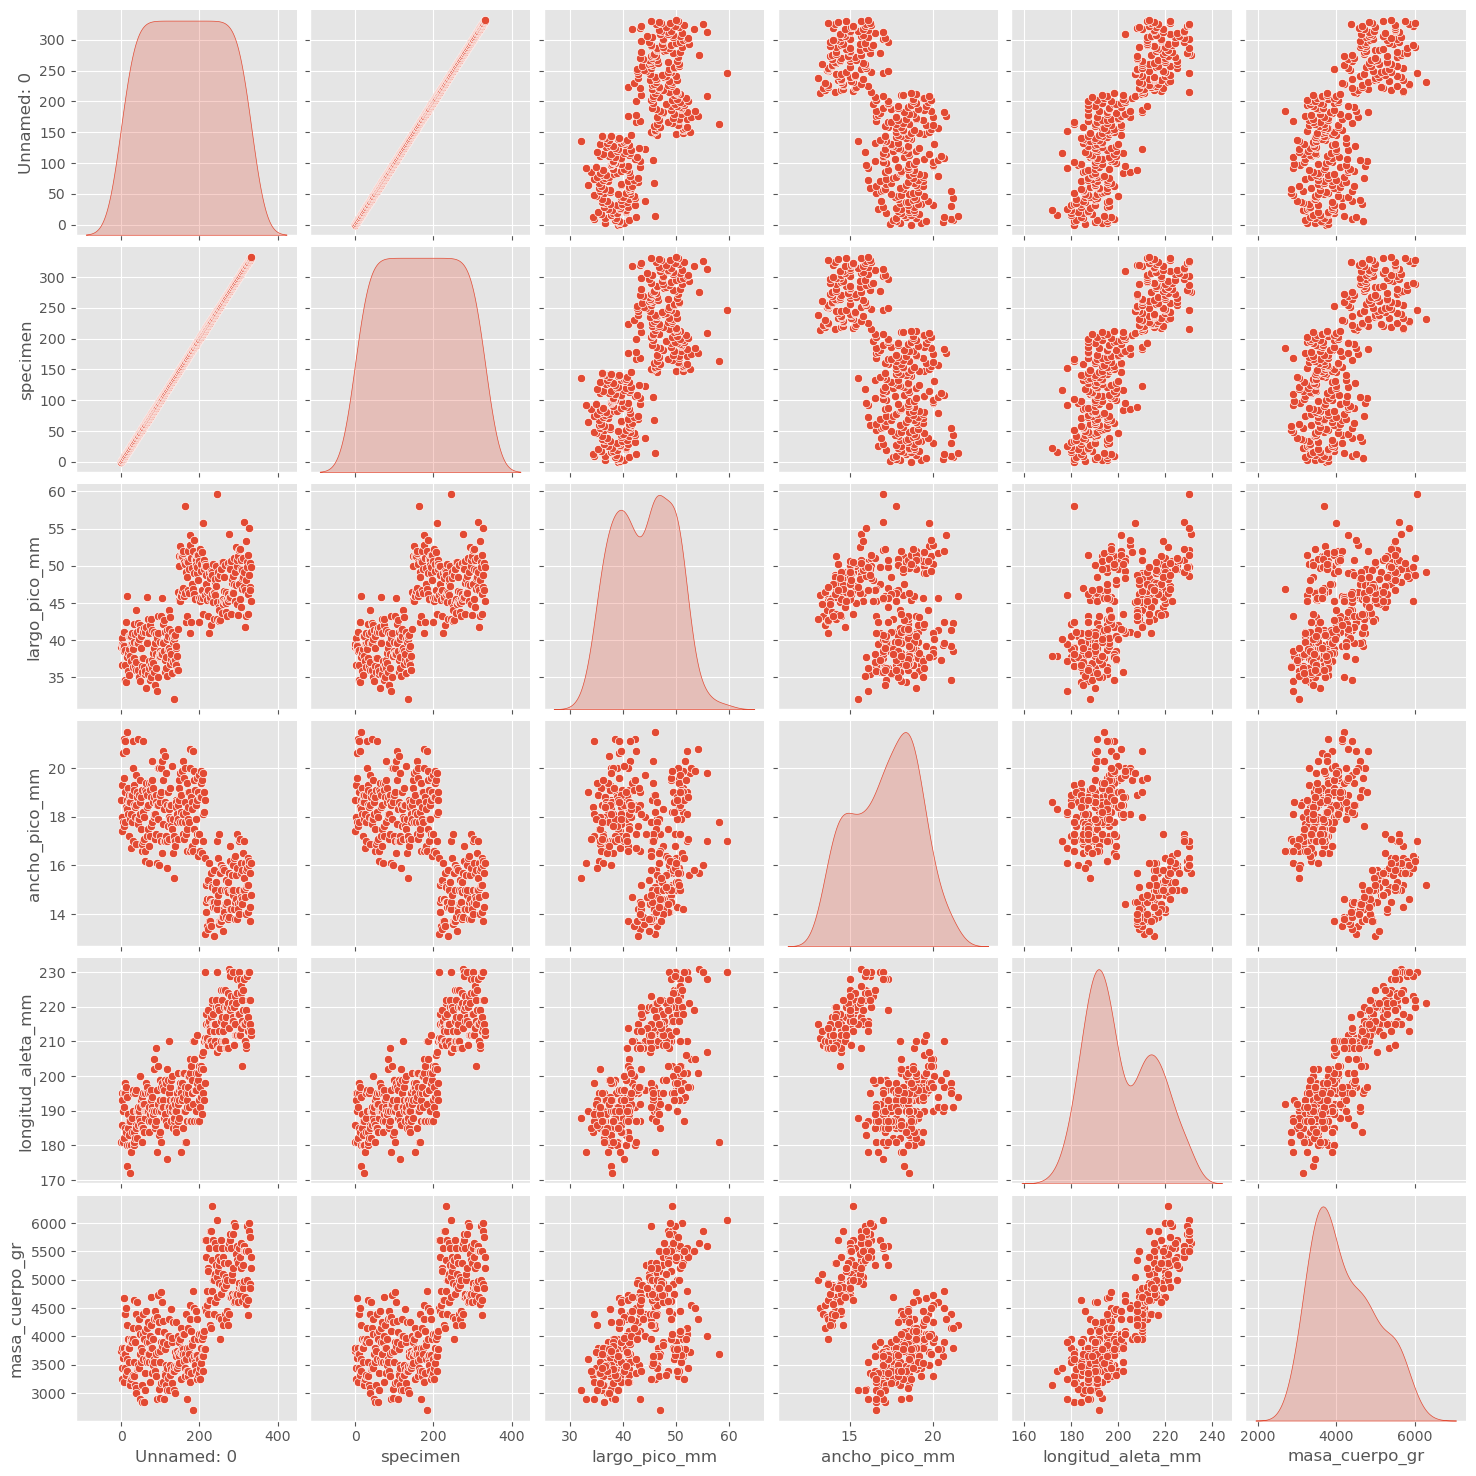

In [11]:
plt.style.use('ggplot')

smp = sns.pairplot(pinguinos,diag_kind='kde',palette="plasma")

Gracias a las graficas anteriores podemos observas que  es posible hacer una separacion para determinar la especie de los pinguinos, tentativamente por el anterior grafico podemos decir que hay por lo menos dos especies.

Eliminaremos las variables que no aportan información y estandarizaremos los datos para asi tener una mejor idea de como se estan comportando.

In [12]:
colums=["largo_pico_mm","ancho_pico_mm","longitud_aleta_mm","masa_cuerpo_gr"]
pingui=pinguinos[colums]

In [13]:
pingui

,largo_pico_mm,ancho_pico_mm,longitud_aleta_mm,masa_cuerpo_gr
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0
...,...,...,...,...
328,47.2,13.7,214.0,4925.0
329,46.8,14.3,215.0,4850.0
330,50.4,15.7,222.0,5750.0
331,45.2,14.8,212.0,5200.0


In [14]:
ss = StandardScaler(with_mean=True,with_std=True).fit(pingui)
pingui_std = ss.transform(pingui) 

In [15]:
pinguidf_std=pd.DataFrame(pingui_std, columns = colums)
pinguidf_std

,largo_pico_mm,ancho_pico_mm,longitud_aleta_mm,masa_cuerpo_gr
0,-0.896042,0.780732,-1.426752,-0.568475
1,-0.822788,0.119584,-1.069474,-0.506286
2,-0.676280,0.424729,-0.426373,-1.190361
3,-1.335566,1.085877,-0.569284,-0.941606
4,-0.859415,1.747026,-0.783651,-0.692852
...,...,...,...,...
328,0.587352,-1.762145,0.931283,0.892957
329,0.514098,-1.457000,1.002739,0.799674
330,1.173384,-0.744994,1.502928,1.919069
331,0.221082,-1.202712,0.788372,1.234995


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


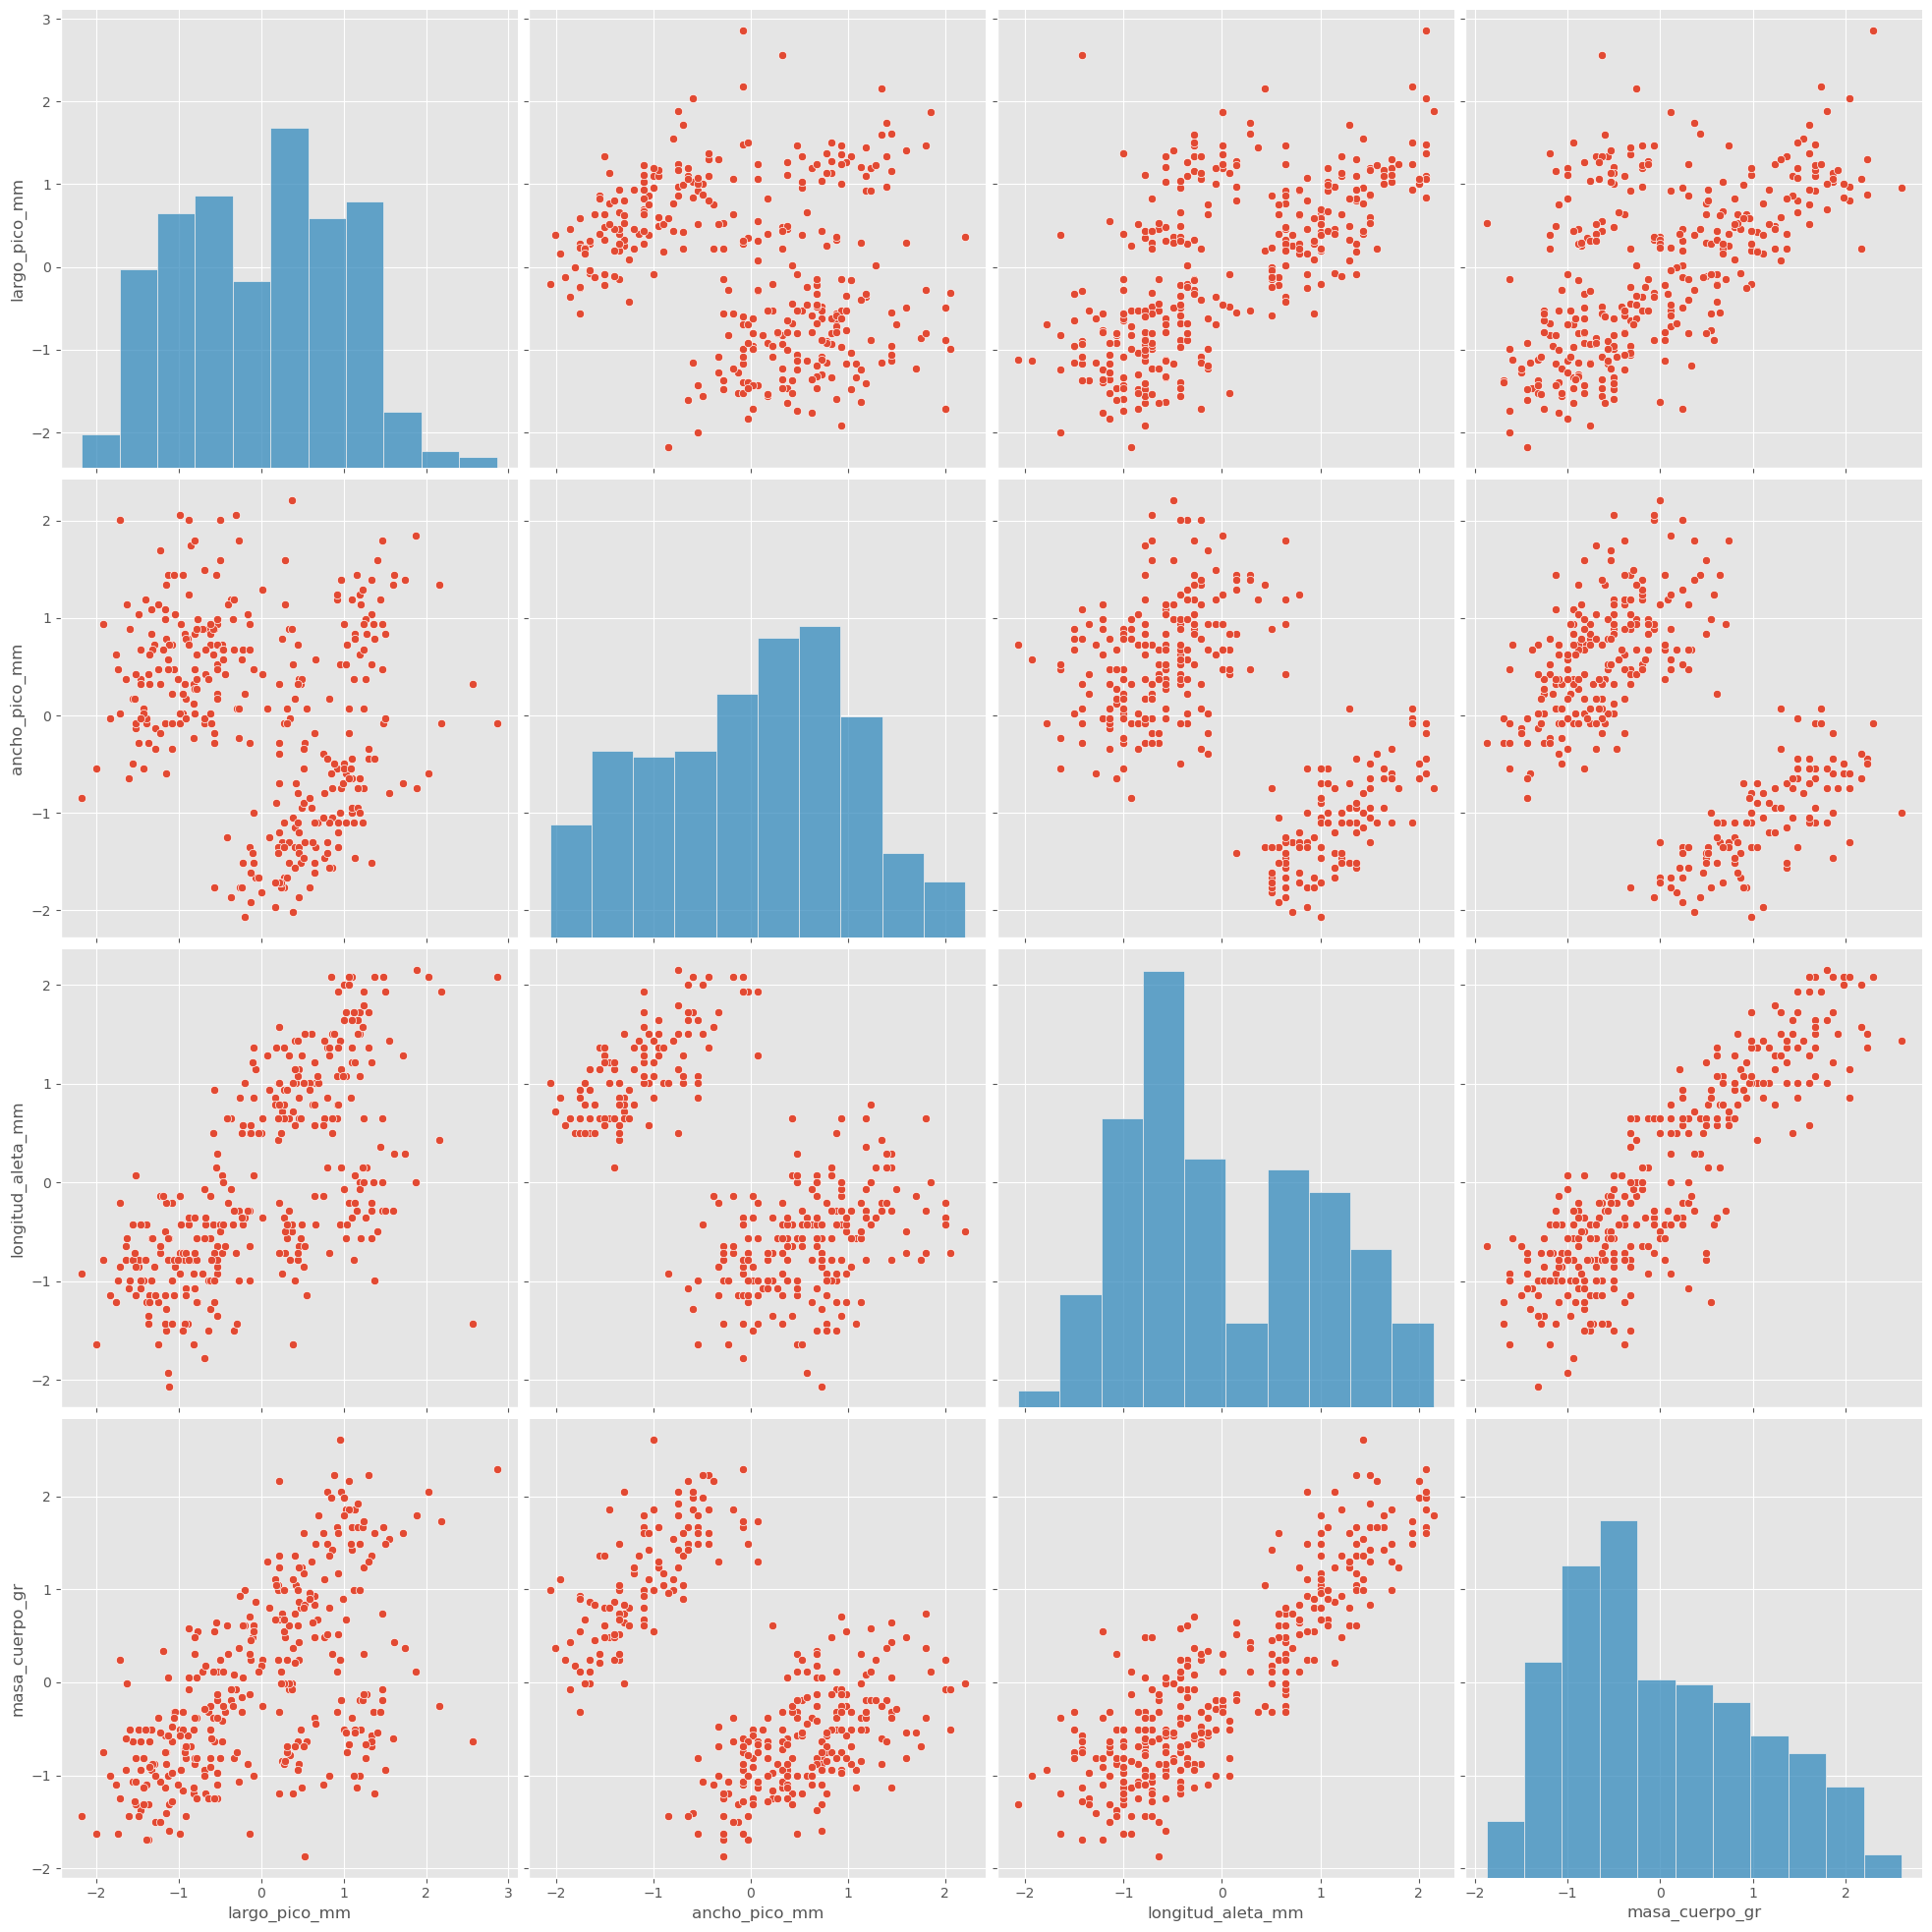

In [16]:
sns.pairplot(pinguidf_std,size=5).savefig('distr_ori.png');

Gracias a que estandarizamos de los datos podemos ver de manera más clara  que si puede haber una clasificación.

Tentativamente tenemos 2 especies, veamos si esto es cierto.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,k,inertia
0,1,1332.000000
1,2,552.671022
2,3,370.766144
3,4,293.904751
4,5,228.506462
5,6,200.282678
6,7,183.126106
7,8,166.700637
8,9,155.019691


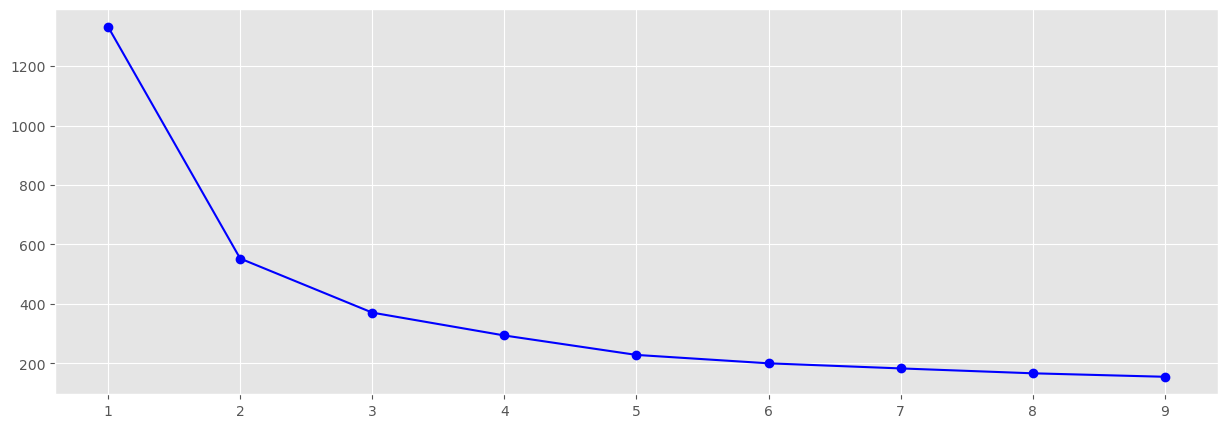

In [17]:
tabla_k = []
for k in list(range(1,10)):
    kmeans = KMeans(n_clusters = k).fit(pinguidf_std)
    tabla_k.append([k, kmeans.inertia_])
    
tabla_k_df = pd.DataFrame(tabla_k, columns = ['k', 'inertia'])
display(tabla_k_df)
plt.figure(figsize=(15,5))
plt.plot(tabla_k_df['k'].values,tabla_k_df['inertia'].values,'b-o')
plt.show()

Gracias a la grafica de codo y brazo podemos observar que el número de clusters esta entre 2 y 3

Y como sabemos que hay por lo menos 3 especies diferentes entonces podemos concluir que hay 3 clusters

In [18]:
kmeans = KMeans(n_clusters = 3).fit(pinguidf_std)
pinguinos['Especie'] = kmeans.predict(pinguidf_std)
pinguinos

,Unnamed: 0,specimen,largo_pico_mm,ancho_pico_mm,longitud_aleta_mm,masa_cuerpo_gr,Especie
0,0,0,39.1,18.7,181.0,3750.0,0
1,1,1,39.5,17.4,186.0,3800.0,0
2,2,2,40.3,18.0,195.0,3250.0,0
3,3,3,36.7,19.3,193.0,3450.0,0
4,4,4,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...,...,...
328,328,328,47.2,13.7,214.0,4925.0,1
329,329,329,46.8,14.3,215.0,4850.0,1
330,330,330,50.4,15.7,222.0,5750.0,1
331,331,331,45.2,14.8,212.0,5200.0,1


In [19]:
pinguinos[41:42]

,Unnamed: 0,specimen,largo_pico_mm,ancho_pico_mm,longitud_aleta_mm,masa_cuerpo_gr,Especie
41,41,41,41.1,19.0,182.0,3425.0,0


In [20]:
pinguinos[328:329]

,Unnamed: 0,specimen,largo_pico_mm,ancho_pico_mm,longitud_aleta_mm,masa_cuerpo_gr,Especie
328,328,328,47.2,13.7,214.0,4925.0,1


In [21]:
pinguinos[148:149]

,Unnamed: 0,specimen,largo_pico_mm,ancho_pico_mm,longitud_aleta_mm,masa_cuerpo_gr,Especie
148,148,148,51.3,19.2,193.0,3650.0,2


In [22]:
pinguinos.replace({0:"Adaile",1:"Gentoo",2:"Chinstrap"},inplace=True)
pinguinos

,Unnamed: 0,specimen,largo_pico_mm,ancho_pico_mm,longitud_aleta_mm,masa_cuerpo_gr,Especie
0,Adaile,Adaile,39.1,18.7,181.0,3750.0,Adaile
1,Gentoo,Gentoo,39.5,17.4,186.0,3800.0,Adaile
2,Chinstrap,Chinstrap,40.3,18.0,195.0,3250.0,Adaile
3,3,3,36.7,19.3,193.0,3450.0,Adaile
4,4,4,39.3,20.6,190.0,3650.0,Adaile
...,...,...,...,...,...,...,...
328,328,328,47.2,13.7,214.0,4925.0,Gentoo
329,329,329,46.8,14.3,215.0,4850.0,Gentoo
330,330,330,50.4,15.7,222.0,5750.0,Gentoo
331,331,331,45.2,14.8,212.0,5200.0,Gentoo


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


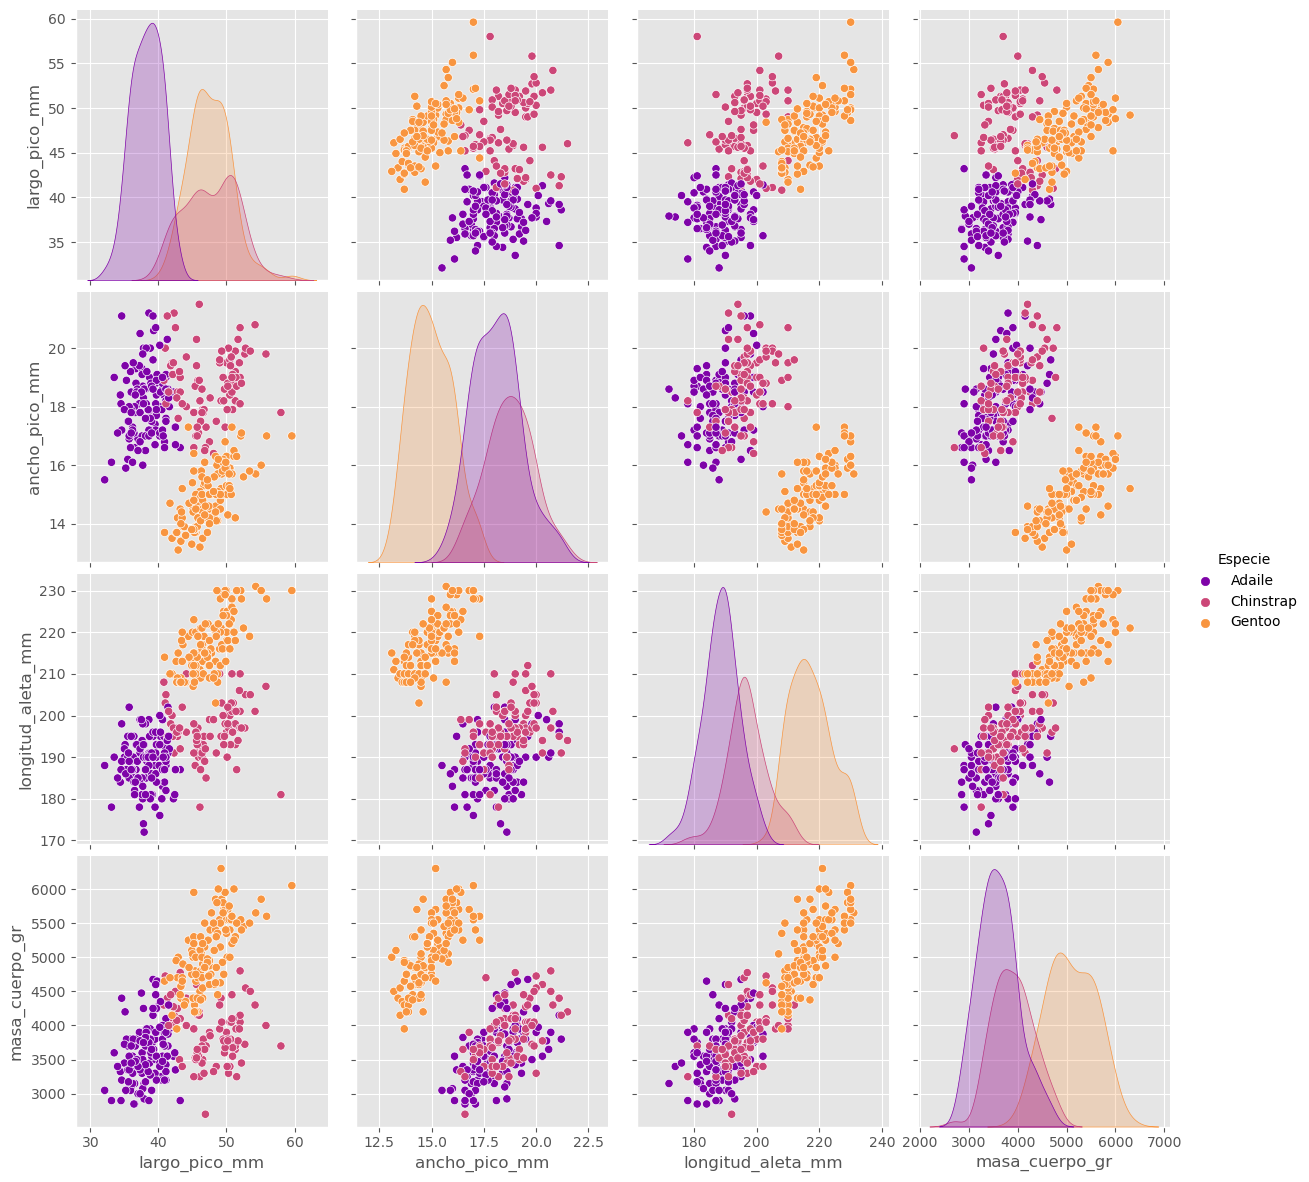

In [23]:
sns.pairplot(pinguinos[colums + ['Especie']],
             hue = 'Especie',
             size = 3,
             palette = "plasma").savefig('clusters.png');

In [24]:
grupos = list(pinguinos['Especie'].unique())
pinguinos['silhouette'] = silhouette_samples(pinguinos[colums], pinguinos['Especie'])
pinguinos = pinguinos.sort_values(['Especie','silhouette'],ascending=False)
pinguinos

,Unnamed: 0,specimen,largo_pico_mm,ancho_pico_mm,longitud_aleta_mm,masa_cuerpo_gr,Especie,silhouette
233,233,233,48.7,15.1,222.0,5350.0,Gentoo,0.676202
295,295,295,50.0,15.9,224.0,5350.0,Gentoo,0.676173
252,252,252,48.7,15.7,208.0,5350.0,Gentoo,0.675918
248,248,248,48.4,16.3,220.0,5400.0,Gentoo,0.675355
260,260,260,50.5,15.9,225.0,5400.0,Gentoo,0.675305
...,...,...,...,...,...,...,...,...
77,77,77,35.1,19.4,193.0,4200.0,Adaile,-0.348308
30,30,30,39.2,21.1,196.0,4150.0,Adaile,-0.348667
40,40,40,39.6,18.8,190.0,4600.0,Adaile,-0.436554
34,34,34,39.8,19.1,184.0,4650.0,Adaile,-0.491062


In [25]:
pinguinos = pinguinos.reset_index().reset_index()

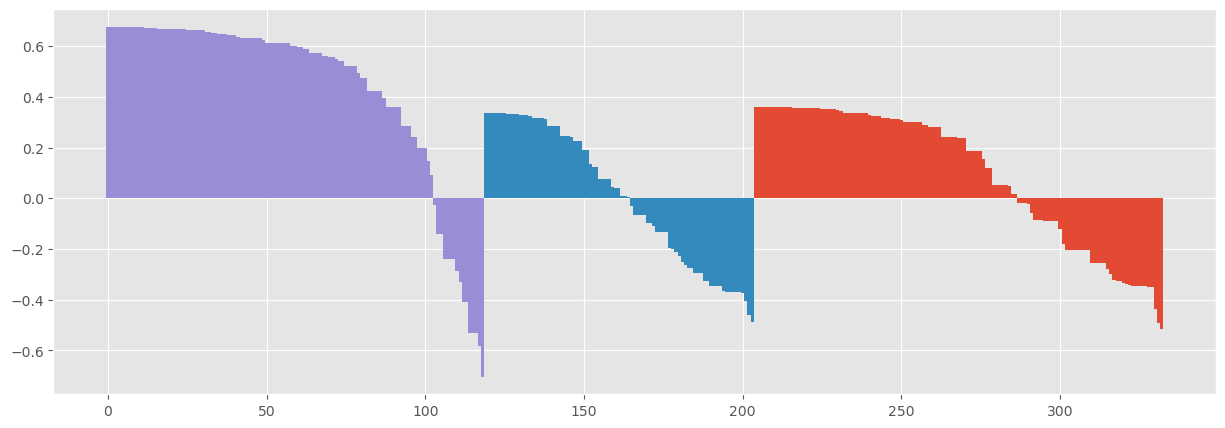

In [26]:
plt.figure(figsize=(15,5))
for grupo in grupos:
    group_df = pinguinos[pinguinos['Especie']==grupo]
    plt.bar(group_df['level_0'],group_df['silhouette'],width=1)

Como podemos ver para una especie casi todos los individuos se parecen a su cluster,  mientras que para las otras dos especies hay una gran cantidad de individuos que no se parecen a su cluster

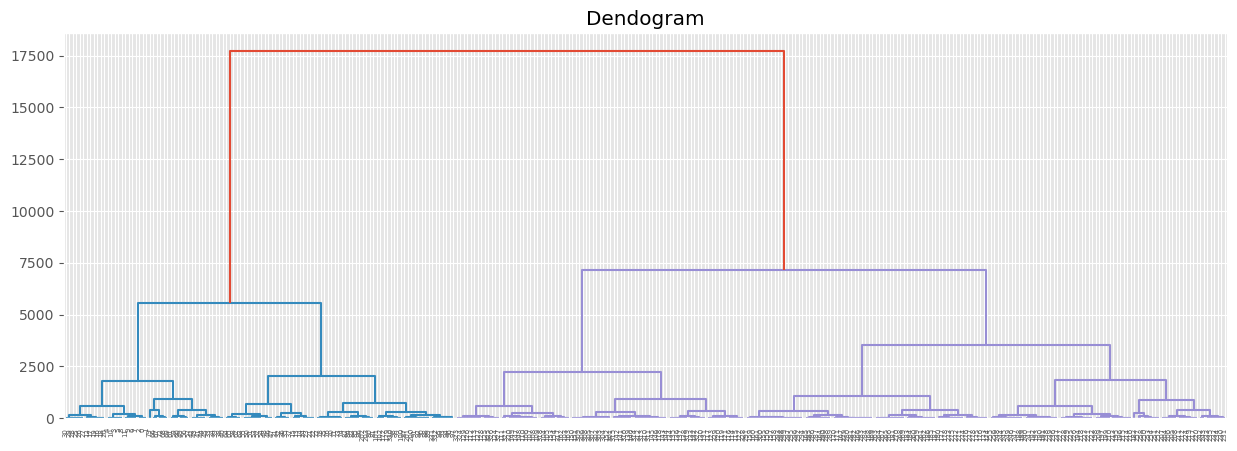

In [27]:
plt.figure(figsize=(15,5))
 
plt.title("Dendogram")  
dend = shc.dendrogram(shc.linkage(pinguinos[colums], method='ward'))  

Gracias al anterior dendograma podemos ver que no coincide con los datos obtenidos ya que pareciera ser que solo se cuenta con solo dos especies en los datos.

## PCA

Veamos si cambia algo usando componentes principales.

In [28]:
rel_path = './datasets/'
pinguinos = pd.read_csv(rel_path + 'pinguinos.csv')
k = 4
pca_pingu_cols = ['pc'+str(i+1) for i in range(0,k)]
pca_pingu_model = PCA(n_components = k).fit(pinguidf_std)

trans_pingu = pd.DataFrame(data = pca_pingu_model.transform(pingui_std),
                              columns=pca_pingu_cols)

pca_pingu_all = pd.concat([pinguinos,trans_pingu],axis=1)
pca_pingu_all[:10]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


,Unnamed: 0,specimen,largo_pico_mm,ancho_pico_mm,longitud_aleta_mm,masa_cuerpo_gr,pc1,pc2,pc3,pc4
0,0,0,39.1,18.7,181.0,3750.0,-1.853593,0.032069,-0.234902,0.528397
1,1,1,39.5,17.4,186.0,3800.0,-1.316254,-0.443527,-0.027470,0.401727
2,2,2,40.3,18.0,195.0,3250.0,-1.376605,-0.161230,0.189689,-0.528662
3,3,3,36.7,19.3,193.0,3450.0,-1.885288,-0.012351,-0.628873,-0.472893
4,4,4,39.3,20.6,190.0,3650.0,-1.919981,0.817598,-0.701051,-0.196416
5,5,5,38.9,17.8,181.0,3625.0,-1.773020,-0.366223,0.028460,0.505369
6,6,6,39.2,19.6,195.0,4675.0,-0.818496,0.501243,-1.335004,0.348260
7,7,7,41.1,17.6,182.0,3200.0,-1.798958,-0.245394,0.626554,0.215178
8,8,8,38.6,21.2,191.0,3800.0,-1.956149,0.998283,-1.040615,-0.210615
9,9,9,34.6,21.1,198.0,4400.0,-1.569523,0.578082,-2.049297,-0.263635


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


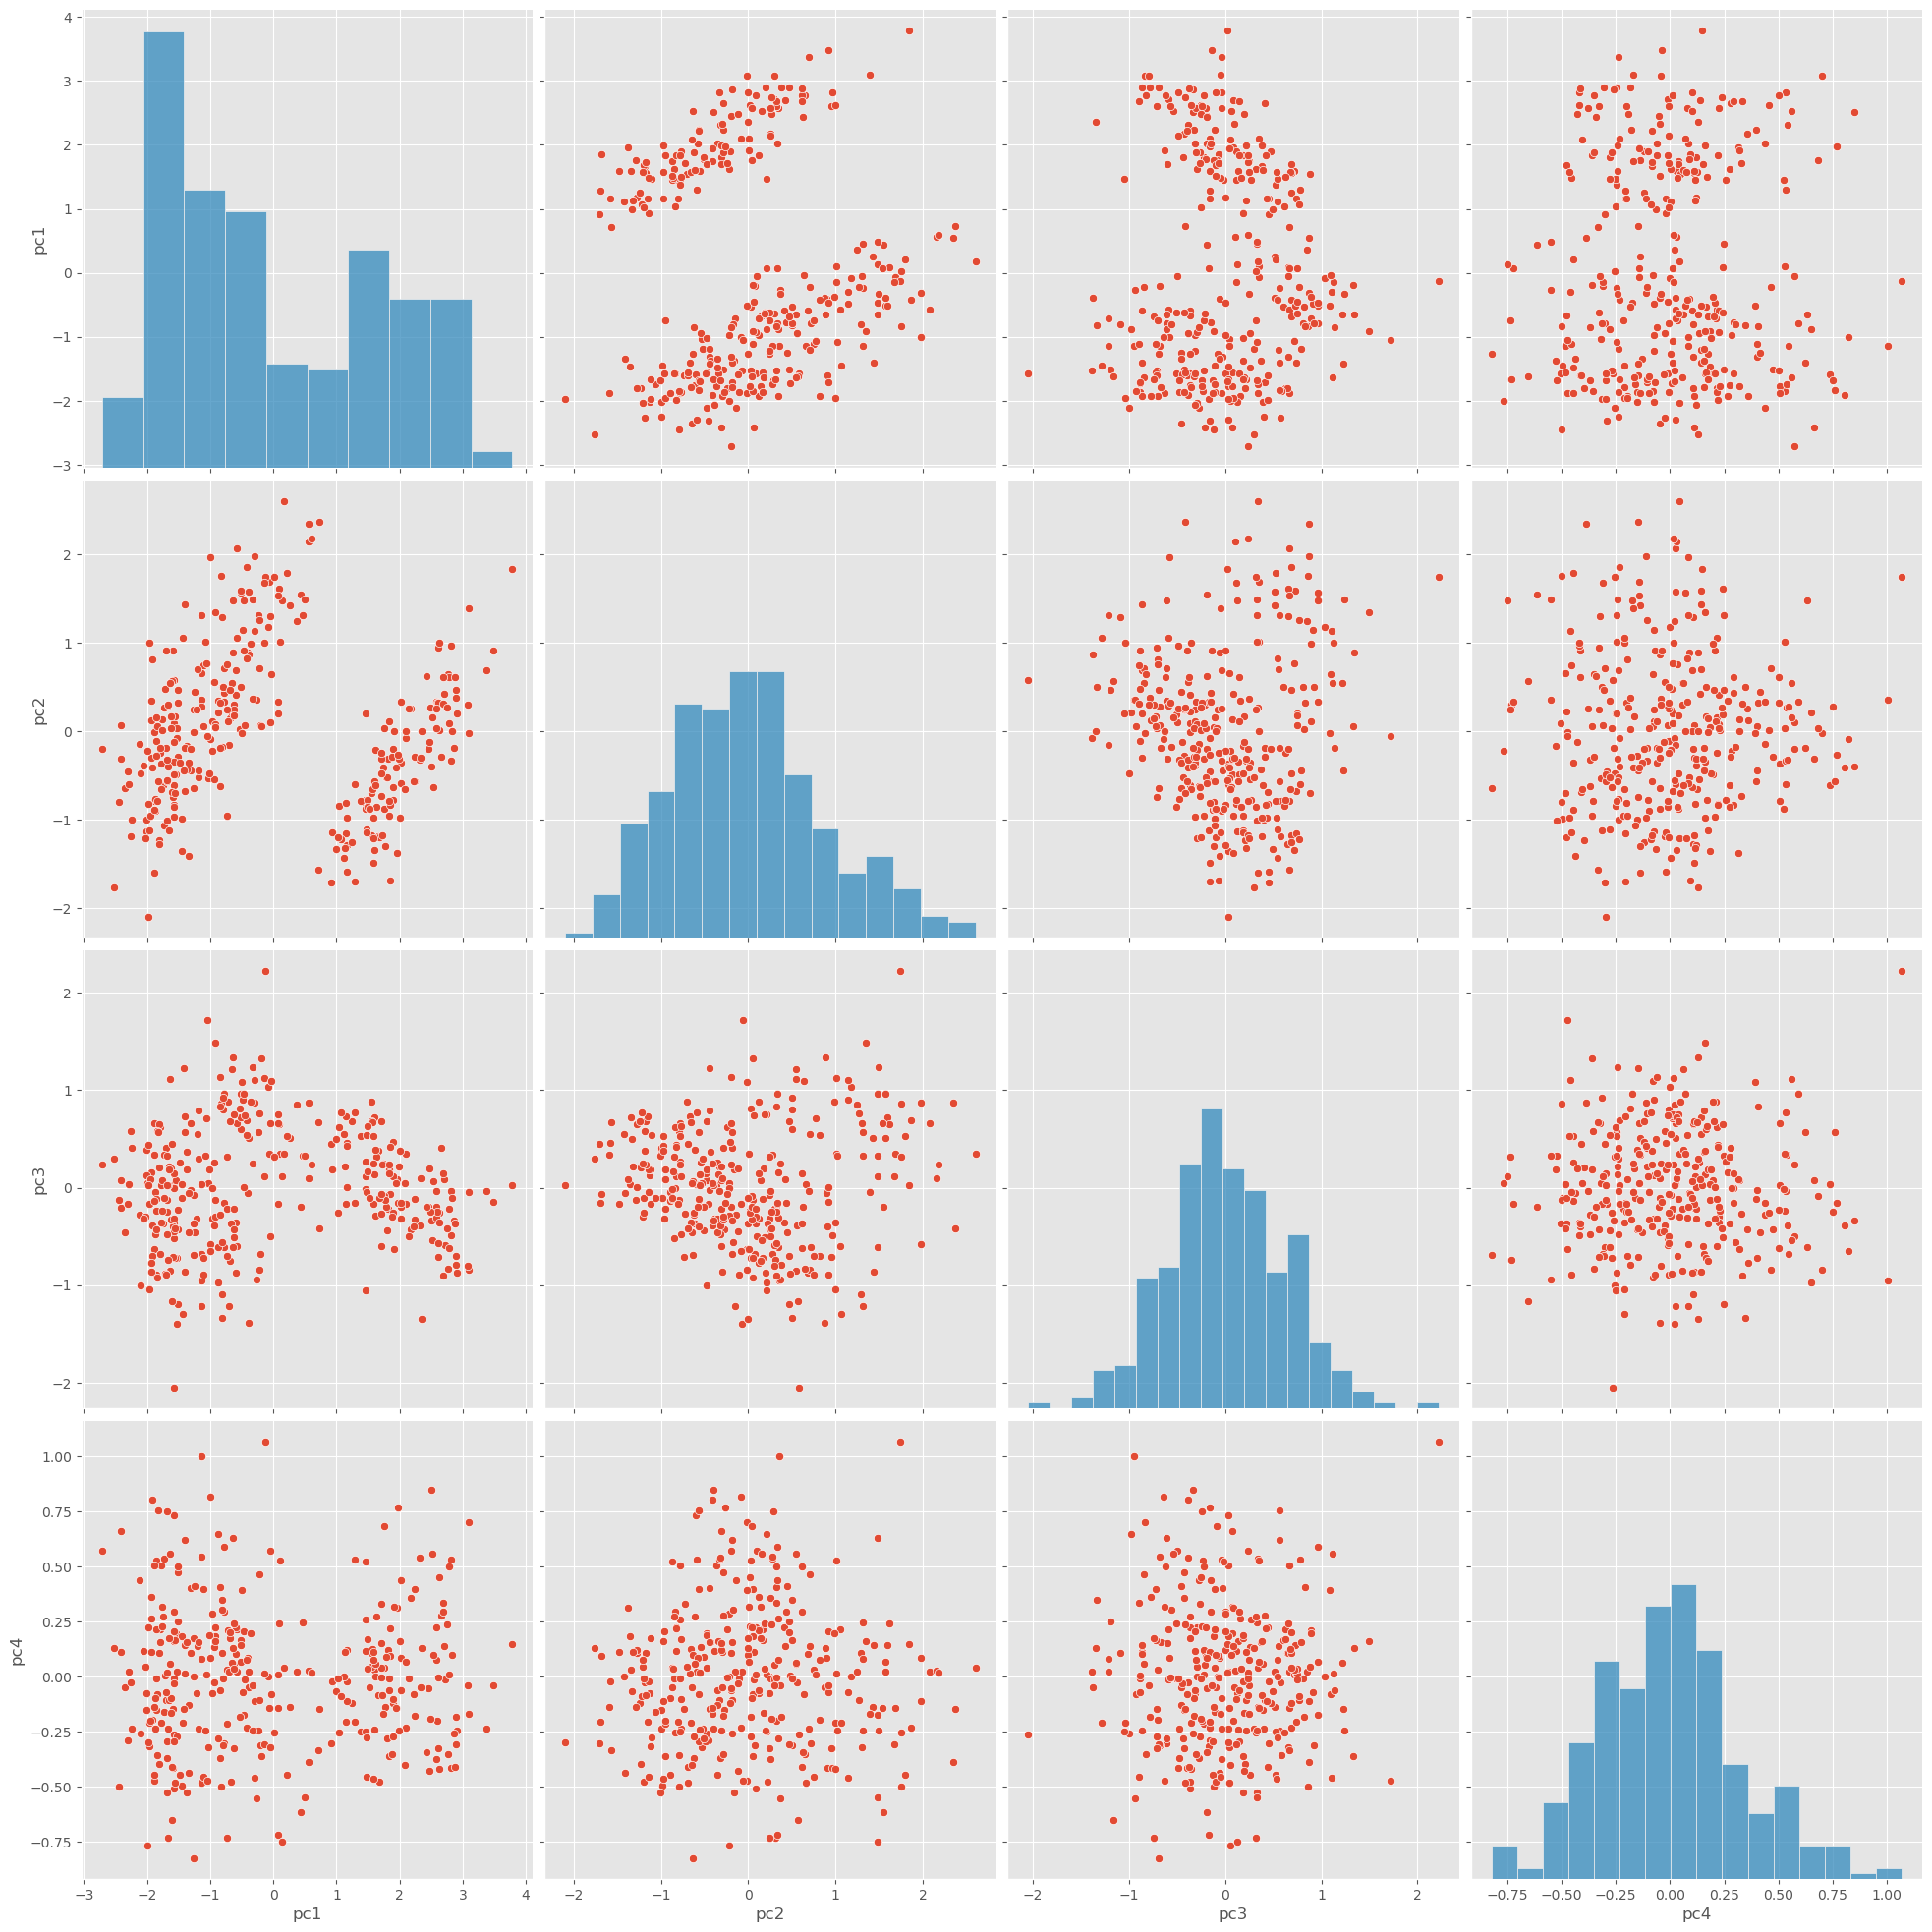

In [29]:
sns.pairplot(pca_pingu_all[pca_pingu_cols],size=5).savefig('distr_ori.png');

Del anterior grafico podemos decir que si puede haber una muy buena separación en dos clusters 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,k,inertia
0,1,1332.000000
1,2,552.671022
2,3,370.766144
3,4,293.904751
4,5,228.506462
5,6,200.535238
6,7,183.040312
7,8,166.826684
8,9,154.956273


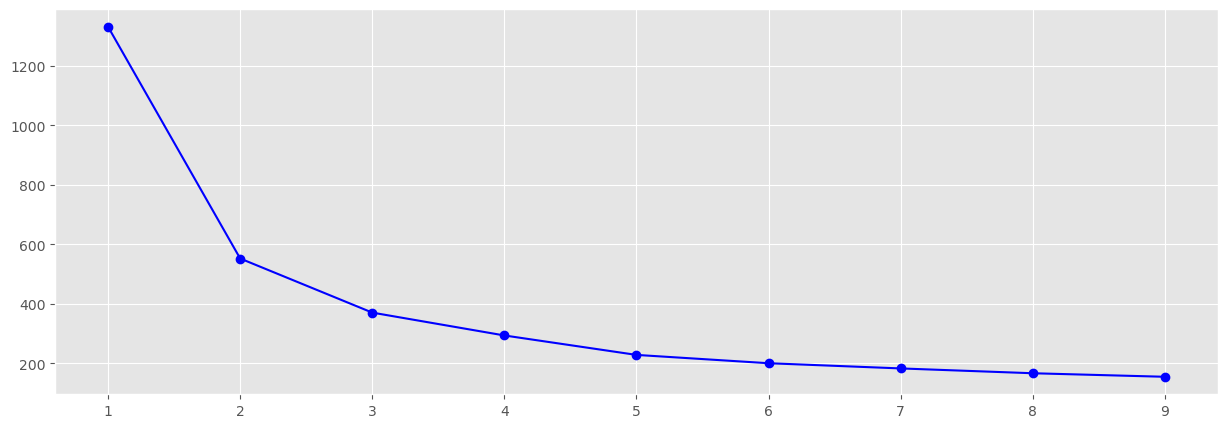

In [30]:
tabla_k = []
for k in list(range(1,10)):
    kmeans = KMeans(n_clusters = k).fit(pca_pingu_all[pca_pingu_cols])
    tabla_k.append([k, kmeans.inertia_])
    
tabla_k_df = pd.DataFrame(tabla_k, columns = ['k', 'inertia'])
display(tabla_k_df)
plt.figure(figsize=(15,5))
plt.plot(tabla_k_df['k'].values,tabla_k_df['inertia'].values,'b-o')
plt.show()

In [31]:
kmeans = KMeans(n_clusters = 3).fit(pca_pingu_all[pca_pingu_cols])
pinguinos['Especie2'] = kmeans.predict(pca_pingu_all[pca_pingu_cols])
grupos = list(pinguinos['Especie2'].unique())
pinguinos['silhouette2'] = silhouette_samples(pinguinos[colums], pinguinos['Especie2'])
pinguinos = pinguinos.sort_values(['Especie2','silhouette2'],ascending=False)


In [32]:
pinguinos = pinguinos.reset_index().reset_index()

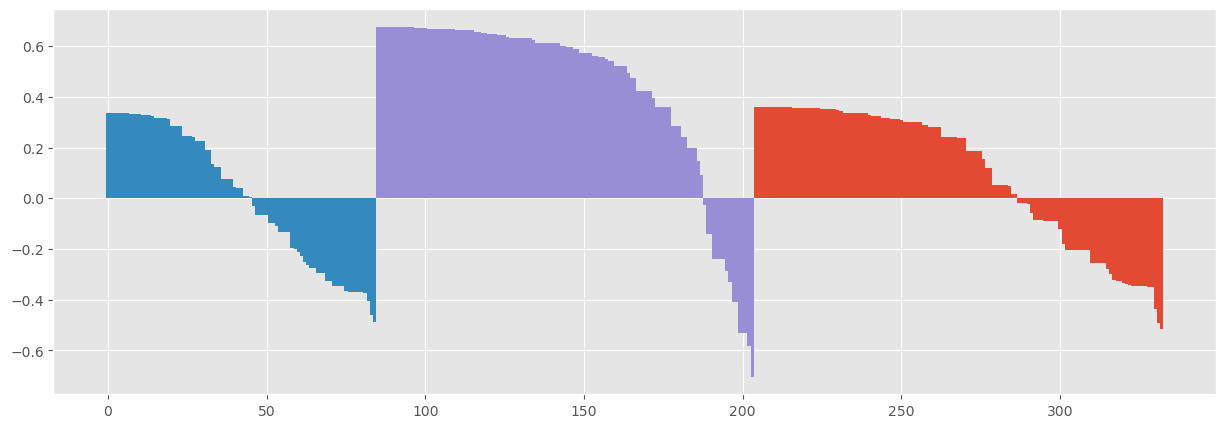

In [33]:
plt.figure(figsize=(15,5))
for grupo in grupos:
    group_df = pinguinos[pinguinos['Especie2']==grupo]
    plt.bar(group_df['level_0'],group_df['silhouette2'],width=1)

Como podemos ver no hay un cambio si usamos PCA 

## Usando K=2

In [34]:
rel_path = './datasets/'
pinguinos = pd.read_csv(rel_path + 'pinguinos.csv')
kmeans = KMeans(n_clusters = 2).fit(pca_pingu_all[pca_pingu_cols])
pinguinos['Especie3'] = kmeans.predict(pca_pingu_all[pca_pingu_cols])
grupos = list(pinguinos['Especie3'].unique())
pinguinos['silhouette3'] = silhouette_samples(pinguinos[colums], pinguinos['Especie3'])
pinguinos = pinguinos.sort_values(['Especie3','silhouette3'],ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


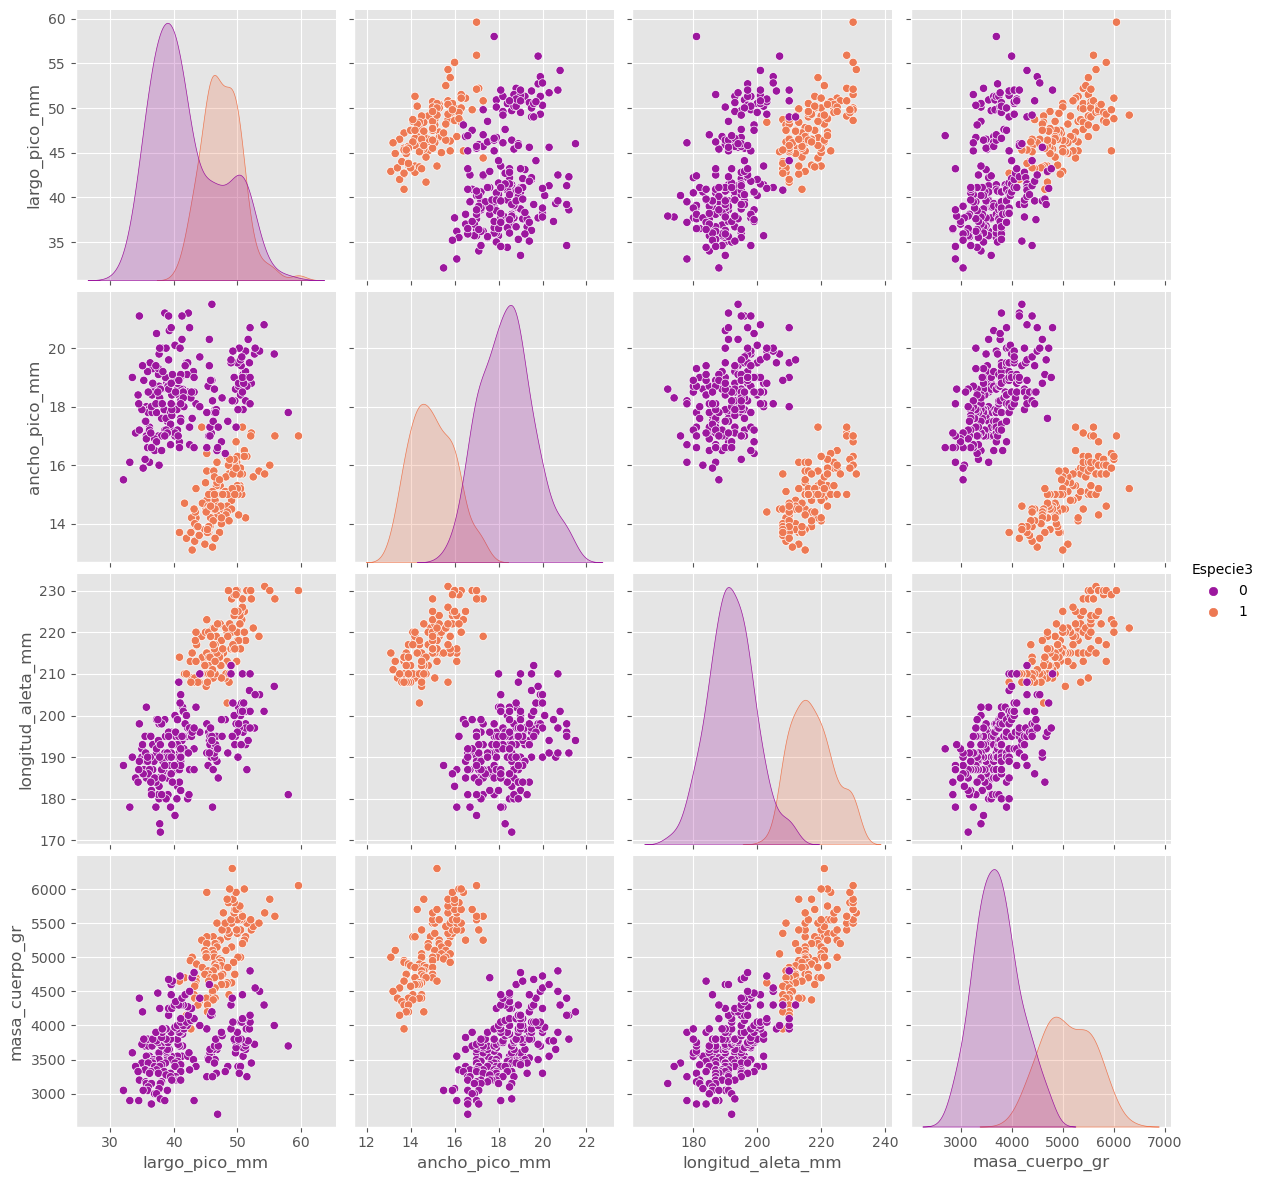

In [37]:
sns.pairplot(pinguinos[colums + ['Especie3']],
             hue = 'Especie3',
             size = 3,
             palette = "plasma").savefig('clusters.png');

Como podemos ver tenemos una mejor separación con solamente 2 clusters pero al saber que por lo menos tenemos 3 especies diferentes entoonces el minimo de clusters con los que podemos empezar es de 3

In [35]:
pinguinos = pinguinos.reset_index().reset_index()

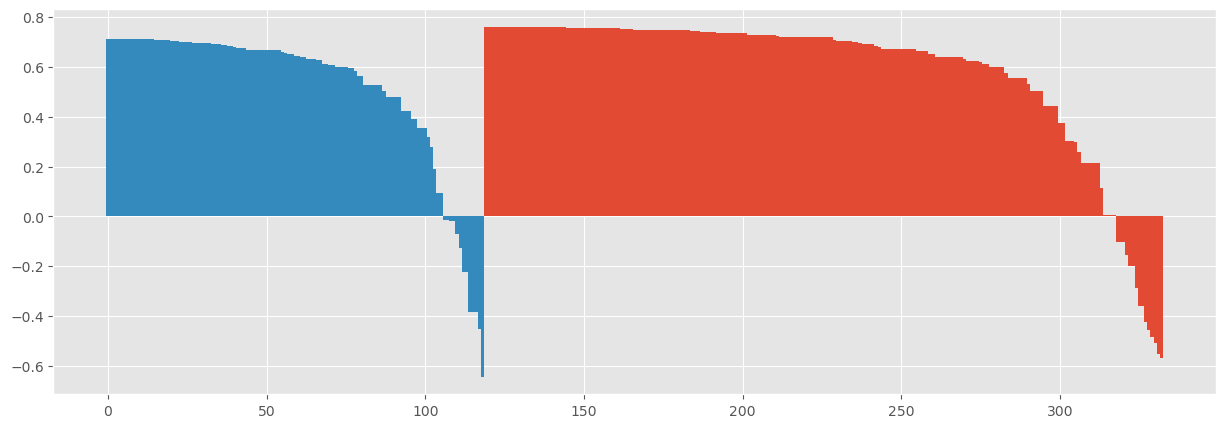

In [36]:
plt.figure(figsize=(15,5))
for grupo in grupos:
    group_df = pinguinos[pinguinos['Especie3']==grupo]
    plt.bar(group_df['level_0'],group_df['silhouette3'],width=1)

Y por ultimo veamos que se comporta de mejor manera la grafica de silhouette para 2 clusters